# <타이타닉 생존자 예측>

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('Kaggle_Ex/titanic/train.csv')
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 셋 Null 값 개수 : ', titanic_df.isnull().sum().sum())

데이터 셋 Null 값 개수 :  0


## 1. Null값이 분포하는 feature 살펴보기

In [49]:
print('Sex 값 분포 : \n', titanic_df['Sex'].value_counts())
print('\nCabin 값 분포 : \n', titanic_df['Cabin'].value_counts())
print('\nEmbarked 값 분포 : \n', titanic_df['Embarked'].value_counts())

Sex 값 분포 : 
 male      577
female    314
Name: Sex, dtype: int64

Cabin 값 분포 : 
 N              687
B96 B98          4
G6               4
C23 C25 C27      4
D                3
              ... 
B80              1
E77              1
A24              1
E34              1
E46              1
Name: Cabin, Length: 148, dtype: int64

Embarked 값 분포 : 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


## 2. Cabin 선실의 호수를 버리고 앞부분만을 취하기

In [50]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'])

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object


# 3. 생존확률을 파악하기 위해 시각화하기

In [51]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

## -성별에 따른 생존 차이

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

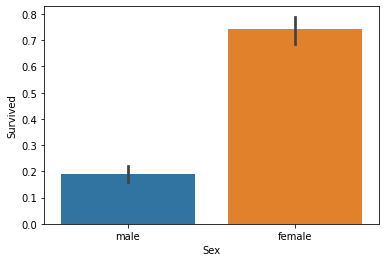

In [52]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

## -객실등급에 따른 생존 차이 

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

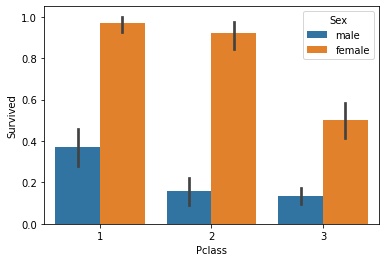

In [53]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

## -나이에 따른 생존 차이

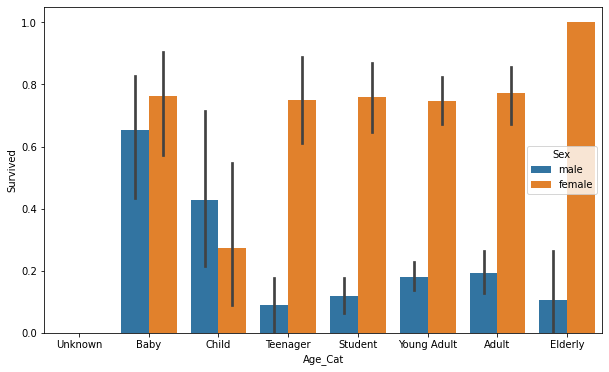

In [54]:
def get_category(age):
    cat=''
    if age <= -1: 
        cat = 'Unknown'
    elif age <= 5:
        cat = 'Baby'
    elif age <= 12:
        cat = 'Child'
    elif age <= 18:
        cat = 'Teenager'
    elif age <= 25:
        cat = 'Student'
    elif age <= 35:
        cat = 'Young Adult'
    elif age <= 60:
        cat = 'Adult'
    else:
        cat = 'Elderly'
        
    return cat

#막대 그래프 크기 조정
plt.figure(figsize=(10, 6))

#x축 값을 순차적으로 표시하기 위함
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

#lambda 식을 이용해서 위의 함수를 반환받음
titanic_df['Age_Cat'] = titanic_df['Age'].apply(lambda x:get_category(x))
sns.barplot(x='Age_Cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_Cat', axis=1, inplace=True)

# 4. 문자열 feature 숫자형 카테고리로 변경하기

In [55]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


Sex, Cabin, Embarked 속성이 숫자형 값으로 바뀐 것을 확인할 수 있다.

# 5. 지금까지의  feature가공 내역 정리 및 함수로 재정의 후 쉽게 재사용하도록 만들기

In [47]:
#Null값 다른값으로 채우기
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    
    return df

#학습에 불필요한 feature 떨구기
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

#레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df

#위의 3가지 데이터 전처리 함수를 호출하는 핸들링 함수
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

---
# 6. 타이타닉 생존자 예측하기

## 6 - 1. transform_features 함수로 다시 데이터를 전처리하기

In [57]:
titanic_df = pd.read_csv('Kaggle_Ex/titanic/train.csv')
# y레이블 titanic_df에서 뽑아낸 후 학습데이터에서 삭제하기
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

#학습데이터 전처리
X_titanic_df = transform_features(X_titanic_df)

## 6 - 2. Train, Test 데이터 나누기

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

## 6 - 3. DecisionTreeClassifier, RandomForestClassifier, Logistic Regression 모델 이용해 학습하기

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#각 모델에 대해 각각의 클래스 객체를 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(max_iter = 1000) #계속 not convergence 오류가 나길래 최대 반복횟수를 늘려주었다.

#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

#RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

#LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도 : 0.7877
RandomForestClassifier 정확도 : 0.8547
LogisticRegression 정확도 : 0.8492


## 6 - 4. 교차검증을 이용해 평가하기

### - Using "KFold"

In [70]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    #폴드 개수 지정 후 객체 생성 및 폴드 개수만큼의 정확도 값 담기 위한 리스트 생성
    kfold = KFold(n_splits=folds)
    scores=[]
    
    #KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))
        
    #평균정확도 계산
    mean_score = np.mean(scores)
    print("[평균 정확도 : {0:.4f}]".format(mean_score))
    
#exec_kfold 실행
print("DecisionTreeClassifier 교차 검증 결과>")
exec_kfold(dt_clf)
print("\nRandomForestClassifier 교차 검증 결과>")
exec_kfold(rf_clf)
print("\nLogistic Regression 교차 검증 결과>")
exec_kfold(lr_clf)

DecisionTreeClassifier 교차 검증 결과>
교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8202
[평균 정확도 : 0.7823]

RandomForestClassifier 교차 검증 결과>
교차 검증 0 정확도 : 0.7933
교차 검증 1 정확도 : 0.8090
교차 검증 2 정확도 : 0.8371
교차 검증 3 정확도 : 0.7753
교차 검증 4 정확도 : 0.8596
[평균 정확도 : 0.8148]

Logistic Regression 교차 검증 결과>
교차 검증 0 정확도 : 0.8045
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7753
교차 검증 3 정확도 : 0.7528
교차 검증 4 정확도 : 0.8202
[평균 정확도 : 0.7867]


### - Using "cross_val_score" API

In [71]:
from sklearn.model_selection import cross_val_score

def UsingCV_API(clf, CV=5):
    scores = cross_val_score(clf, X_titanic_df, y_titanic_df, cv=CV)
    for iter_count, accuracy in enumerate(scores):
        print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))
    print("평균 정확도 : {0:.4f}".format(np.mean(scores)))

print("DecisionTreeClassifier 교차 검증 결과>")
UsingCV_API(dt_clf)
print("\nRandomForestClassifier 교차 검증 결과>")
UsingCV_API(rf_clf)
print("\nLogistic Regression 교차 검증 결과>")
UsingCV_API(lr_clf)

DecisionTreeClassifier 교차 검증 결과>
교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7753
교차 검증 2 정확도 : 0.7921
교차 검증 3 정확도 : 0.7865
교차 검증 4 정확도 : 0.8427
평균 정확도 : 0.7879

RandomForestClassifier 교차 검증 결과>
교차 검증 0 정확도 : 0.7933
교차 검증 1 정확도 : 0.7978
교차 검증 2 정확도 : 0.8483
교차 검증 3 정확도 : 0.7640
교차 검증 4 정확도 : 0.8652
평균 정확도 : 0.8137

Logistic Regression 교차 검증 결과>
교차 검증 0 정확도 : 0.7933
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7809
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8090
평균 정확도 : 0.7867


KFold 검증방법과 조금 차이를 보이는 이유는 cross_val_score API는 내부적으로 StraifiedKFold를 사용해 교차검증을 하기 때문이다.

## 6 - 5. GridSearchCV 이용해 최적의 하이퍼 파라미터 찾기

In [75]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10], 'min_samples_split':[2, 3, 5], 'min_samples_leaf':[1, 5, 8]}

def Grid_clf(clf, param, CV=5):
    grid_clf = GridSearchCV(clf, param_grid=param, scoring='accuracy', cv=CV)
    grid_clf.fit(X_train, y_train)
    
    print("GridSearchCV 최적 하이퍼 파라미터 : ", grid_clf.best_params_)
    print("GridSearchCV 최고 정확도 : {0:.4f}".format(grid_clf.best_score_))
    best_clf = grid_clf.best_estimator_
    
    #GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
    pred = best_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print("테스트 셋에서의 정확도 : {0:.4f}".format(accuracy))
    
print("DecisionTreeClassifier 교차 검증 결과>")
Grid_clf(dt_clf, parameters)
print("\nRandomForestClassifier 교차 검증 결과>")
Grid_clf(rf_clf, parameters)
print("\nLogistic Regression 교차 검증 결과>")
print("로지스틱 회귀에서는 parameter의 값을 가질 수 없으므로 시행하지 않습니다.")

DecisionTreeClassifier 교차 검증 결과>
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 셋에서의 정확도 : 0.8715

RandomForestClassifier 교차 검증 결과>
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.8146
테스트 셋에서의 정확도 : 0.8827

Logistic Regression 교차 검증 결과>
로지스틱 회귀에서는 parameter의 값을 가질 수 없으므로 시행하지 않습니다.
